# **MileStone 1**
---
This document contains the basic information about how we are planning to preprocess our data and what data sources we are using. The code below is not considered to be a final solution, it is more like a baseline of what we are planning to use and how.

The document was created in google colab so that we do not have to store the datasets (approx 5Gb) on our own machine. The raw data sources can be found [here](https://drive.google.com/drive/folders/1O9ZS7PPEc8SXzKDZ8U9kF87hU8xlFO3B?usp=sharing), information about them can be seen below.



In [1]:
import os
from os import system
import cv2
import scipy.io
import matplotlib.pyplot as plt
from IPython.display import clear_output
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive




---


**Setting up the environment**

In order to be able to work with our data, we have created a [drive folder](https://drive.google.com/drive/folders/1O9ZS7PPEc8SXzKDZ8U9kF87hU8xlFO3B?usp=sharing). If you want to replicate our work, you have to put the zip files to your own drive (root/deeplearning).
We are using 2 datasets:


*   **Face detection:**  [wider-face-1](https://paperswithcode.com/dataset/wider-face-1). 

This is a pretty convenient dataset, we have changed the structure of the folders though. 

*   **Portrait painging:** [ArtGAN](https://github.com/cs-chan/ArtGAN/tree/master/WikiArt%20Dataset) 

This is the collected WikiArt Dataset. It has originally proven to be too large for the task (approx. 24 Gb), so we have selected only the early- mid- and laterenaissance styled images.

**WARNING! This dataset is huge, the unzipping would result in 5 GB of output images.**


In [2]:
!unzip /content/drive/MyDrive/deeplearning/face_detection
!unzip /content/drive/MyDrive/deeplearning/painting
!cd /content #switching to content folder for convenience
clear_output(wait=True)
print('raw data loaded')

raw data loaded




---


**Constants we're going to use**


* each task has its own folder (**painting / face_detection**, in which the images are already divided into **train, test and validation** sets
* the face detection's set also contains a **label** folder in which we can find the expected output values for each image
* **height and width** is to help us resize images using cv2

*Disclaimer: The painting's dataset does not contain the expected output labels as we do not seem to need such data (we are planning to use GAN for this task)*


In [3]:
painting = 'painting/'
face_detection = 'face_detection/'

train = 'train/'
test = 'test/'
validation = 'val/'

label = 'labels/'
train_label = 'train.mat'
test_label = 'test.mat'
validation_label = 'val.mat'

WIDTH=200
HEIGHT=200




---


**Processing the images**

In order to process each dataset, we have created a function, that gets the source folder as a parameter and returns a list of tensors that are the results of processing the images by cv2. Below you can see the function and the usage of it.

In [4]:
def create_dataset_from(source):
    images = []
    content = os.listdir(source)
    for pic in content:
      image = cv2.imread(source + pic)
      try:
        image = cv2.resize(image, (HEIGHT, WIDTH), interpolation = cv2.INTER_AREA)
      except Exception:
        pass

      #creating insight to the processing
      print('processing ' + source +': ' + str(round((len(images) / len(content)) *100, 2)) +"%")
      clear_output(wait=True) 
      images.append(image)
    print('processing ' + source + ' is finished.')
    return images

In [5]:
painting_train = create_dataset_from(painting+train)
painting_val = create_dataset_from(painting+validation)
painting_test = create_dataset_from(painting + test)

face_detection_train = create_dataset_from(face_detection + train)
face_detection_val = create_dataset_from(face_detection + validation)
face_detection_test = create_dataset_from(face_detection + test)

processing face_detection/test/ is finished.


**Processing the expected output values**

We had some difficulties as these values has been stored in .mat files which are usually used in matlab. We found the scipy package, which (we assume) can be used to read values from these files.

In [6]:
train_Y = scipy.io.loadmat(face_detection+label+train_label)
val_Y = scipy.io.loadmat(face_detection+label+validation_label)
test_Y = scipy.io.loadmat(face_detection+label+test_label)



---


**Examples of the processed data**


Portrait data example:
 
train 
 shape(200, 200, 3)


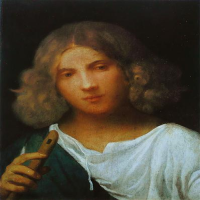

test 
 shape(200, 200, 3)


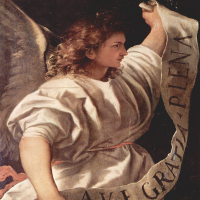


 Face detection example:

train 
 shape(200, 200, 3)


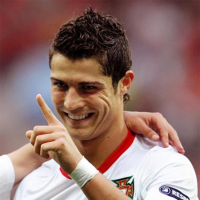

validation 
 shape(200, 200, 3)


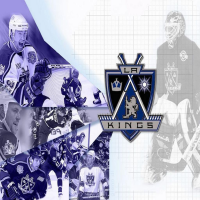


 train expected values example:
[array([[449, 330, 122, 149]], dtype=int32)]


In [7]:
print('Portrait data example:\n ')
print('train \n shape' + str(painting_train[2].shape))
cv2_imshow(painting_train[2]) 

print('test \n shape' + str(painting_test[2].shape))
cv2_imshow(painting_test[2])

print('\n Face detection example:\n')
print('train \n shape' + str(face_detection_train[0].shape))
cv2_imshow(face_detection_train[0]) 

print('validation \n shape' + str(face_detection_val[0].shape))
cv2_imshow(face_detection_val[2])

print('\n train expected values example:')
# we haven't decided yet wether we want to squeeze the tensor or not, so we kept it as created
print(train_Y.get('face_bbx_list')[0][0][0])
